In [ ]:
#Task3: Gaussian Mixture Model
#Step1: Step 1: Create Two Clusters
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(42)

# Cluster 1
mean1 = [4.5, 1.8]
cov1 = [[0.2, 0.05],
        [0.05, 0.1]]

data1 = np.random.multivariate_normal(mean1, cov1, 100)

# Cluster 2
mean2 = [6.0, 2.5]
cov2 = [[0.3, -0.04],
        [-0.04, 0.2]]

data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Combine
X = np.vstack((data1, data2))


In [2]:
#means → centers of clusters (high usage / low usage houses)

#covariances → spread of clusters

#weights → probability of each cluster
# We start with random guesses.


k = 2  # number of clusters

n, d = X.shape  # n samples, d features

# Initial means
means = X[np.random.choice(n, k, replace=False)]

# Initial covariance matrices
covariances = [np.cov(X.T) for _ in range(k)]

# Initial mixing coefficients
weights = np.ones(k) / k


In [3]:
iterations = 2

for step in range(iterations):

    # E-step
    responsibilities = np.zeros((n, k))
    for i in range(k):
        rv = multivariate_normal(means[i], covariances[i])
        responsibilities[:, i] = weights[i] * rv.pdf(X)
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    # M-step
    Nk = responsibilities.sum(axis=0)
    weights = Nk / n
    means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]

    covariances = []
    for i in range(k):
        diff = X - means[i]
        cov = np.dot(responsibilities[:, i] * diff.T, diff) / Nk[i]
        covariances.append(cov)


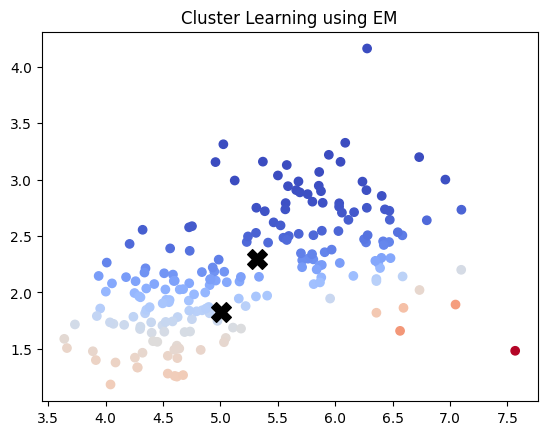

In [4]:
plt.scatter(X[:,0], X[:,1], c=responsibilities[:,0], cmap='coolwarm')
plt.scatter(means[:,0], means[:,1], c='black', marker='X', s=200)
plt.title("Cluster Learning using EM")
plt.show()
